In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/MDI220/mini-projet
%ls

/content/drive/My Drive/Colab Notebooks/MDI220/mini-projet
2a.jpg  MDI220-MINIPROJET.ipynb  NuclearPowerAccidents2016.csv
3a.jpg  miniprojet.ipynb         pictures.ipynb


In [ ]:
import pandas as pd
import  matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as stats
import numpy as np
import seaborn as sns
import math

# Exercise 1
## 1

In [ ]:
# read data
data = pd.read_csv('./NuclearPowerAccidents2016.csv')
print("Nombre totale d'accidents: %d." % data.shape[0])

# select data before 3/28/1979
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%Y")
division_date = pd.to_datetime('3/28/1979', format="%m/%d/%Y")
data = data[data['Date'] < division_date]
print("Nombre d'accidents avant 3/28/1979 is: %d." % data.shape[0])

# select cost and remove missing values
costs = data['Cost (millions 2013US$)']
costs = costs.dropna(axis = 0)
costs = costs.tolist()
print("Dimension de vecteur de coût avant 3/28/1979 avec les observations manquantes surrprimées: %d." % len(costs))

Nombre totale d'accidents: 216.
Nombre d'accidents avant 3/28/1979 is: 56.
Dimension de vecteur de coût avant 3/28/1979 avec les observations manquantes surrprimées: 55.


## 2

### (a)

![2a.jpg](https://github.com/LilyNLP/mdi220-mini-project/blob/main/2a.jpg?raw=true)

### (b)

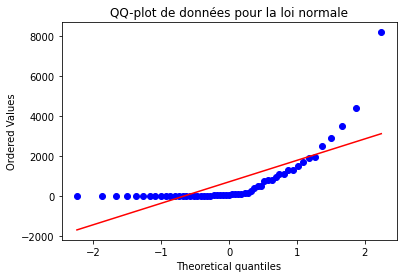

La racine carrée du coefficient de détermination de la loi normale est: 0.743897.


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
_,(_, _, r) = stats.probplot(costs, dist='norm', plot=ax)
ax.set_title("QQ-plot de données pour la loi normale")
plt.show()
print("La racine carrée du coefficient de détermination de la loi normale est: %f." % r)

## 3

### (a)

![3a](https://github.com/LilyNLP/mdi220-mini-project/blob/main/3a.jpg?raw=true)

### (b)


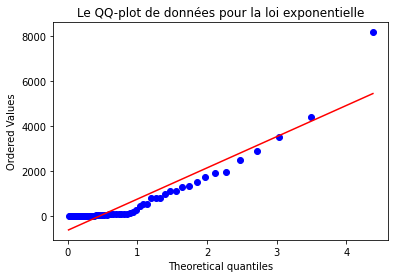

La racine carrée du coefficient de détermination de la loi exponentielle est: 0.930509.


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
_,(_, _, r) = stats.probplot(costs, dist="expon", plot=ax)
ax.set_title("Le QQ-plot de données pour la loi exponentielle")
plt.show()
print("La racine carrée du coefficient de détermination de la loi exponentielle est: %f." % r)

## 4
On constate que le QQ-plot de données pour la loi exponentielle ressemble plus à une droite. Pour quantifier la comparaison, la racine carrée du coefficient de détermination de la loi exponentielle 0.930509 est plus haute que celle de la loi normale 0.743897.

# Exercise 2
## 1
![2.1](https://github.com/LilyNLP/mdi220-mini-project/blob/main/2.1.jpg?raw=true)


In [ ]:
lambda_est = 1/(np.mean(costs))
print("L'estimateur du maximum de vraisemblance est: %f." % lambda_est)

L'estimateur du maximum de vraisemblance est: 0.001377.


## 2

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


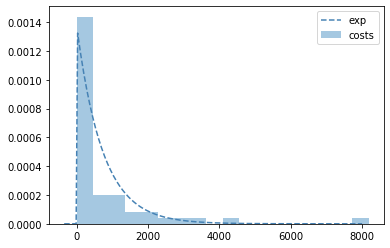

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 
exp = np.random.exponential(scale = 1/lambda_est, size = 10000)
sns.distplot(costs, ax=ax, kde=False, norm_hist=True, label = 'costs')
sns.distplot(exp, ax=ax, kde=False, hist=False, fit=stats.expon, fit_kws={'color':'steelblue','linestyle':'--'}, label = 'exp')
plt.legend() 
plt.show()

## 3
![2.3](https://github.com/LilyNLP/mdi220-mini-project/blob/main/2.3.jpg?raw=true)
## 4

In [ ]:
T1 = np.mean(costs)
print("g1 calculé en utilisant T1 est: %f." %T1)

g1 calculé en utilisant T1 est: 726.336364.


## 5
![2.5](https://github.com/LilyNLP/mdi220-mini-project/blob/main/2.5.jpg?raw=true)
## 6
![2.6](https://github.com/LilyNLP/mdi220-mini-project/blob/main/2.6.jpg?raw=true)

In [ ]:
# calculer l'estimateur
coef = math.log(2)
T1_coef = coef*np.mean(costs)
print("L'estimateur sans biais de la médiane est: %f." % T1_coef)

# calculer la médian empirique
costs.sort()
median = costs[28]
print("La médian empirique est: %f" % median)

L'estimateur sans biais de la médiane est: 503.458003.
La médian empirique est: 98.000000




## 7
![2.7](https://github.com/LilyNLP/mdi220-mini-project/blob/main/2.7.jpg?raw=true)

In [ ]:
threshold_n = (1-coef**2)/(coef**2-2*coef+1)
print("Quand n > %f, EQM de T1_coef est plus grand, sinon EQM de T1 est plus grand." % threshold_n)

Quand n > 5.517783, EQM de T1_coef est plus grand, sinon EQM de T1 est plus grand.


# Exercise3
## 1
![3.1](https://github.com/LilyNLP/mdi220-mini-project/blob/main/3.1.jpg?raw=true)
## 2
![3.2](https://github.com/LilyNLP/mdi220-mini-project/blob/main/3.2.jpg?raw=true)
## 3
Dans le test suivant, on constate que la somme des observations est plus petit que k. Ainsi on peut affirmer que le coût moyen d’accident est inférieur à un milliard.

In [ ]:
k = stats.gamma.ppf(0.95, len(costs), scale = 1000)
somme = np.sum(costs)
print("La somme des observations est: %f." % somme)
print("K est: %f." % k)
p_value = 1 - stats.gamma.cdf(somme, len(costs), scale = 1000)
print("La p-valeur est: %f." % p_value)

La somme des observations est: 39948.500000.
K est: 67740.088964.
La p-valeur est: 0.986283.


## 4

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


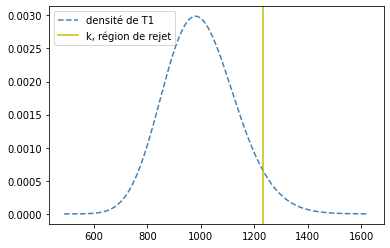

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
gamma1 = np.random.gamma(scale = 1000, shape = len(costs), size = 10000) / len(costs)
sns.distplot(gamma1, ax=ax, kde=False, hist=False, fit=stats.gamma, fit_kws={'color':'steelblue','linestyle':'--'}, label = 'densité de T1') 
k1 = stats.gamma.ppf(0.95, len(costs), scale = 1000) / len(costs)
plt.axvline(x=k1, color='y', linestyle='-', label = 'k, région de rejet')
plt.legend()
plt.show()

## 5

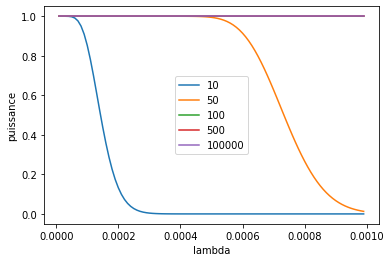

In [ ]:
def puissance(lamda,n):
    return 1 - stats.gamma.cdf(k, a=n, scale = 1/lamda)

fig = plt.figure()
ax = fig.add_subplot(111)
lamda = np.array(range(1,100))/100000
N = [10,50,100,500,100000]
for n in N:
    y =[puissance(x,n) for x in lamda]
    plt.plot(lamda,y)
plt.xlabel("lambda")
plt.ylabel("puissance")
plt.legend(N)
plt.show()

## 6
![3.6](https://github.com/LilyNLP/mdi220-mini-project/blob/main/3.6.jpg?raw=true)